In [171]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

### **Data Exploration**

In [ ]:
# Load the dataset
happiness_df = pd.read_csv('happiness.csv')
happiness_df.info()
happiness_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [173]:
# Display the statistics of the dataset
happiness_df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [174]:
# Check for unique, missing and duplicated values
inspection_df = pd.DataFrame({
    'Unique': happiness_df.nunique(),
    'Missing': happiness_df.isnull().sum(),
    'Type': happiness_df.dtypes,
    'Sample': happiness_df.loc[0],
    'Duplicate': happiness_df.duplicated().sum()
})
inspection_df

,Unique,Missing,Type,Sample,Duplicate
Overall rank,156,0,int64,1,0
Country or region,156,0,object,Finland,0
Score,154,0,float64,7.632,0
GDP per capita,147,0,float64,1.305,0
Social support,146,0,float64,1.592,0
Healthy life expectancy,143,0,float64,0.874,0
Freedom to make life choices,136,0,float64,0.681,0
Generosity,122,0,float64,0.202,0
Perceptions of corruption,110,1,float64,0.393,0


### **Data Visualization**

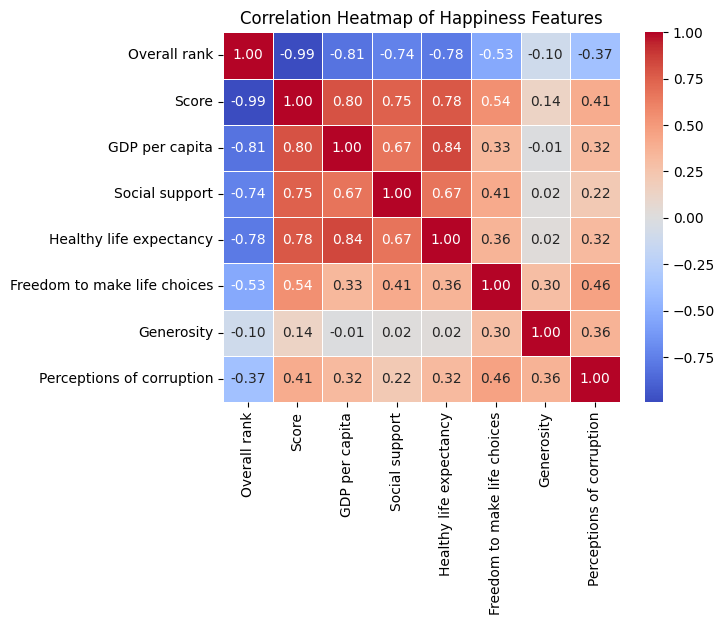

In [175]:
# Visualize the correlation heatmap of the dataset
corr = happiness_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Happiness Features')
plt.show()

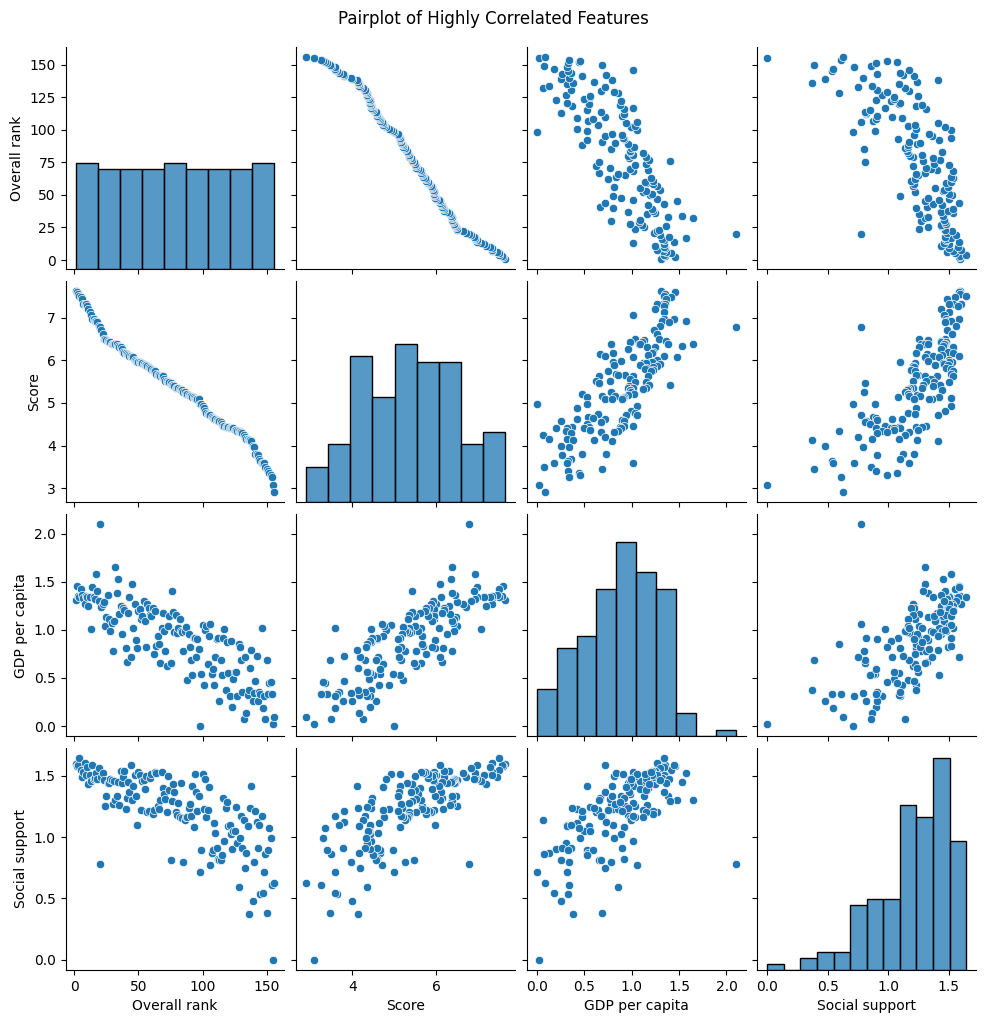

In [176]:
# Visualize the highly correlated features
sns.pairplot(happiness_df[['Overall rank', 
                           'Score', 
                           'GDP per capita', 
                           'Social support']])
plt.suptitle('Pairplot of Highly Correlated Features', y=1.02)
plt.show()

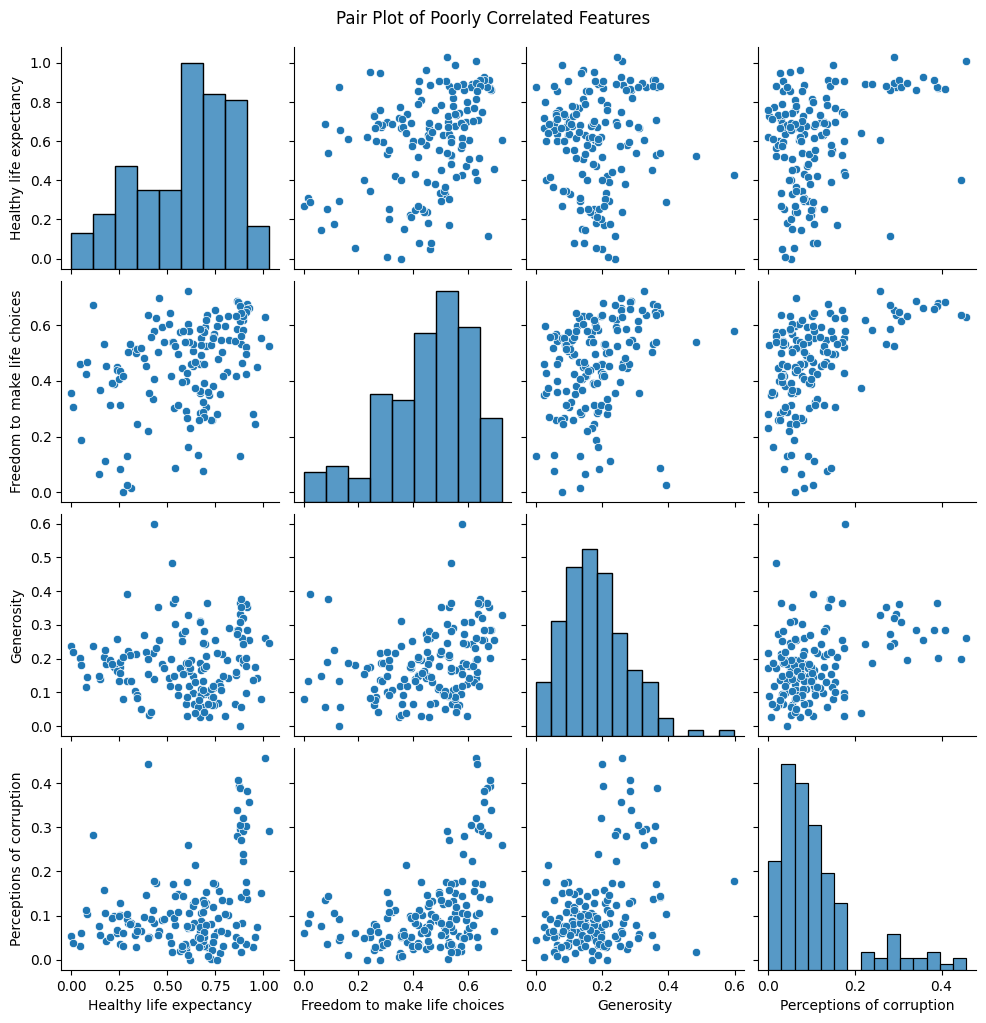

In [177]:
# Visualize the poorly correlated features
sns.pairplot(happiness_df[['Healthy life expectancy',
                           'Freedom to make life choices', 
                           'Generosity', 
                           'Perceptions of corruption']])
plt.suptitle('Pair Plot of Poorly Correlated Features', y=1.02)
plt.show()

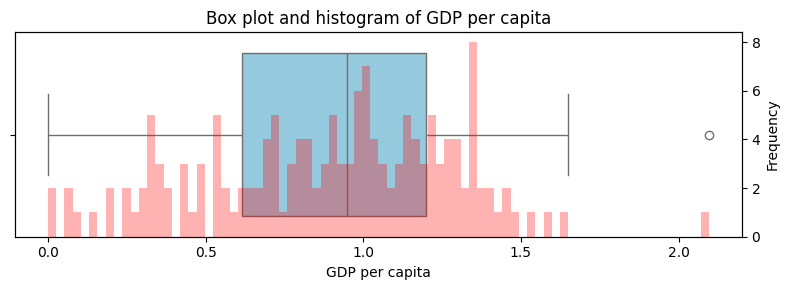

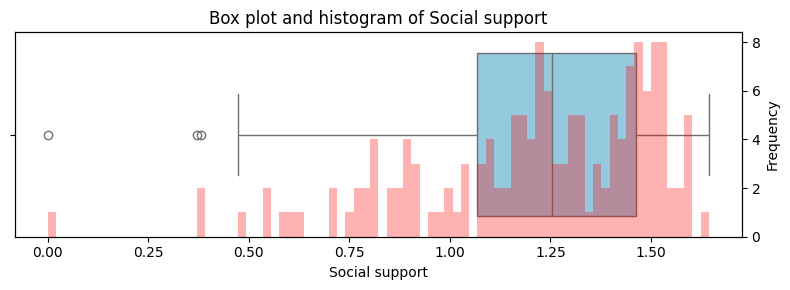

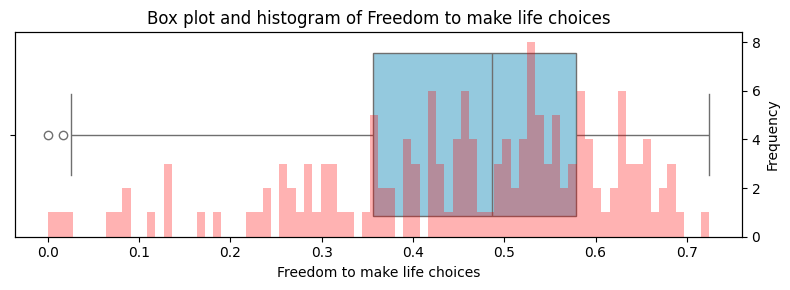

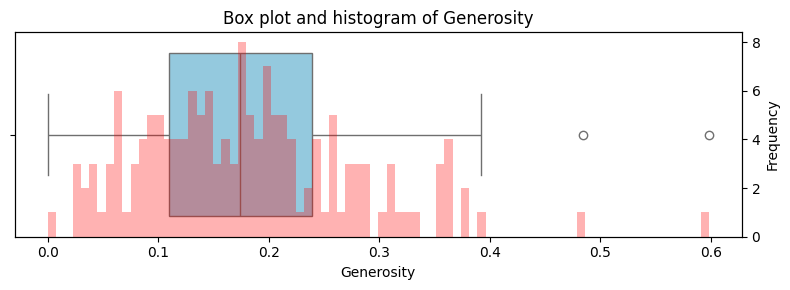

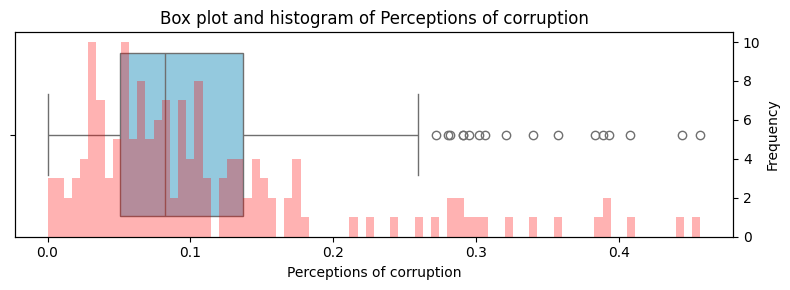

In [178]:
# Select the features with outliers
outlier_features = ['GDP per capita', 
                   'Social support', 
                   'Freedom to make life choices', 
                   'Generosity', 
                   'Perceptions of corruption']

# Visulize the outliers using box plots and histograms
for feature in outlier_features:
    fig, ax1 = plt.subplots(figsize=(8, 3))
    
    sns.boxplot(x=happiness_df[feature], ax=ax1, color='skyblue')
    ax1.set_title(f'Box plot and histogram of {feature}')
    ax1.set_xlabel(feature)
    ax1.set_yticklabels([])
    
    ax2 = ax1.twinx()
    sns.histplot(happiness_df[feature], bins=80, ax=ax2, color='red', alpha=0.3, edgecolor=None)
    ax2.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

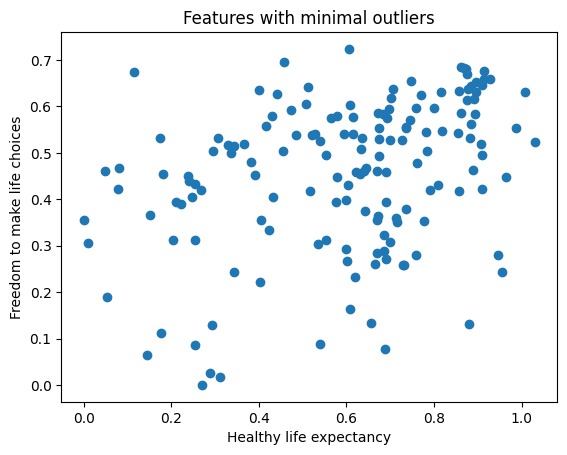

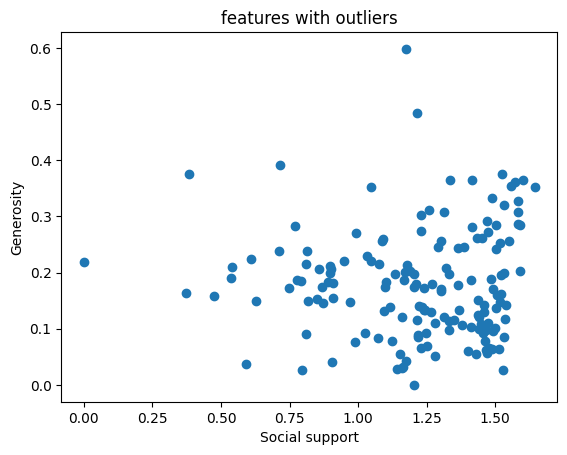

In [179]:
# Scatter plot of features with minimal outliers
plt.scatter(happiness_df['Healthy life expectancy'], happiness_df['Freedom to make life choices'])
plt.xlabel('Healthy life expectancy')
plt.ylabel('Freedom to make life choices')
plt.title('Features with minimal outliers')
plt.show()

# Scatter plot of features with maximal outliers
plt.scatter(happiness_df['Social support'], happiness_df['Generosity'])
plt.xlabel('Social support')
plt.ylabel('Generosity')
plt.title('features with outliers')
plt.show()

### **Data Preprocessing**

In [180]:
# Fill the missing value using mean
feature_mean = happiness_df['Perceptions of corruption'].mean()
happiness_df['Perceptions of corruption'] = happiness_df['Perceptions of corruption'].fillna(feature_mean)
happiness_df['Perceptions of corruption'].isnull().sum()

0

In [181]:
# Calculate IQR and remove outliers
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove the outliers twice to ensure that they are removed
sample_size = happiness_df.shape[0]

for column in outlier_features:
    no_outlier_df = handle_outliers(happiness_df, column)

print(f'Outliers removed: {sample_size - no_outlier_df.shape[0]}')

Outliers removed: 17


In [183]:
# Drop unnecessary columns
columns_to_drop = ['Overall rank', 'Country or region']
happiness_df.drop(columns=columns_to_drop, axis=1, inplace=True)
no_outlier_df = no_outlier_df.drop(columns=columns_to_drop, axis=1)
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Score                         156 non-null    float64
 1   GDP per capita                156 non-null    float64
 2   Social support                156 non-null    float64
 3   Healthy life expectancy       156 non-null    float64
 4   Freedom to make life choices  156 non-null    float64
 5   Generosity                    156 non-null    float64
 6   Perceptions of corruption     156 non-null    float64
dtypes: float64(7)
memory usage: 8.7 KB


### **Model Training**

In [184]:
# Split the dataset into features and target variables
X1 = happiness_df.drop(columns='Score')
y1 = happiness_df['Score']

X2 = no_outlier_df.drop(columns='Score')
y2 = no_outlier_df['Score']

In [185]:
# Split the dataset into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

train_test_shape = pd.DataFrame({
    'Training' : (X1_train.shape[0], y1_train.shape[0]),
    'Testing' : (X1_test.shape[0], y1_test.shape[0]),
    'Total' : (X1.shape[0], y1.shape[0])
})
train_test_shape

,Training,Testing,Total
0,124,32,156
1,124,32,156


In [197]:
# Train a linear regression model on the dataset with outliers
with_outlier_model = LinearRegression(n_jobs=-1, positive=True)
with_outlier_model.fit(X1_train, y1_train)

# Train a linear regression model on the dataset without outliers
without_outlier_model = LinearRegression(n_jobs=-1,positive=True)
without_outlier_model.fit(X2_train, y2_train)

LinearRegression(n_jobs=-1, positive=True)

### **Model Evaluation**

In [198]:
# Evaluate the models using regression metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mae, mse, r2

mae1, mse1, r21 = evaluate_model(with_outlier_model, X1_test, y1_test)
mae2, mse2, r22 = evaluate_model(without_outlier_model, X2_test, y2_test)

# Create a DataFrame to compare the models
model_comparison = pd.DataFrame({
    'Model': ['With Outliers', 'Without Outliers'],
    'MAE': [mae1, mae2],
    'MSE': [mse1, mse2],
    'R2 Score': [r21, r22]
})
model_comparison

,Model,MAE,MSE,R2 Score
0,With Outliers,0.451669,0.318747,0.692214
1,Without Outliers,0.390873,0.240064,0.773940


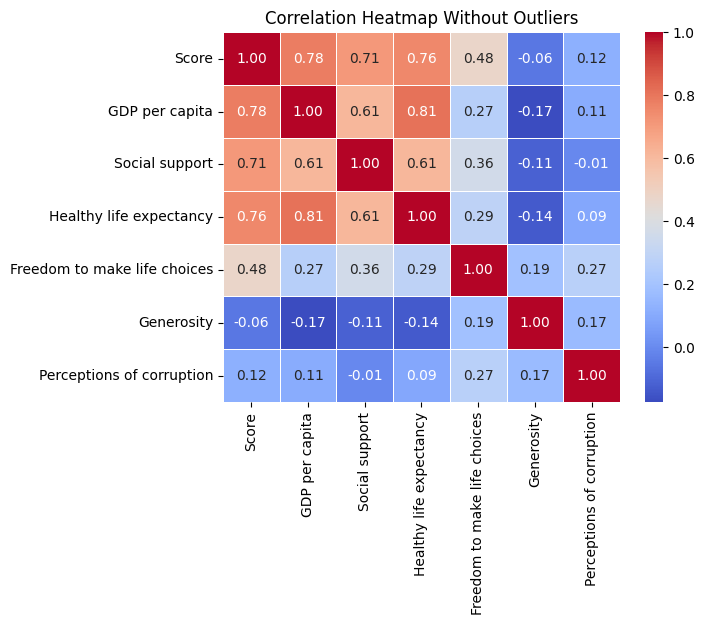

In [188]:
# Visualize the correlation heatmap after removing outliers
corr = no_outlier_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap Without Outliers')
plt.show()